<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## Metrics for Regression


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to evaluate a regression model using various metrics.</p>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
<li><a href="#Task-3---Split-the-data-set">Task 3 - Split the data set</a></li>
    <li><a href="#Task-4---Build-and-Train-a-Linear-Regression-Model">Task 4 - Build and Train a Linear Regression Model</a></li>
        <li><a href="#Task-5---Evaluate-the-model">Task 5 - Evaluate the model</a></li>    
        </ol>
    </li>
    


<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(diamond-dataset)">Exercise 1 - Loading a dataset (diamond dataset)</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Split-the-data">Exercise 3 - Split the data</a></li>
    <li><a href="#Exercise-4---Predict-values">Exercise 4 - Predict values</a></li>
    <li><a href="#Exercise-5---Evaluate-the-model">Exercise 5 - Evaluate the model</a></li>
    </ol>
</ol>




## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Identify the target and features.
 - Split the dataset into training and testing sets.
 - Use Linear Regression to build a prediction model.
 - Use metrics to evaluate the model.


## Datasets

In this lab you will be using dataset(s):

 - Modified version of car mileage dataset. Original dataset available at https://archive.ics.uci.edu/ml/datasets/auto+mpg 
 - Modified version of diamonds dataset. Original dataset available at https://www.openml.org/search?type=data&sort=runs&id=42225&status=active
 


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !pip install pandas==1.3.4
# !pip install scikit-learn==0.20.1
# !pip install numpy==1.21.6

In [1]:
# You can use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

#import functions for train test split

from sklearn.model_selection import train_test_split

# import functions for metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

## Task 1 - Load the data in a csv file into a dataframe


In [3]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)


Let's look at some sample rows from the dataset we loaded:


In [4]:
# show 5 random rows from the dataset
df.sample(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
373,22.0,6,232.0,112,2835,14.7,82,American
344,34.7,4,105.0,63,2215,14.9,81,American
15,17.0,8,302.0,140,3449,10.5,70,American
42,26.0,4,91.0,70,1955,20.5,71,American
164,15.0,6,250.0,72,3432,21.0,75,American


Let's find out the number of rows and columns in the dataset:


In [5]:
df.shape

(392, 8)

Let's create a scatter plot of Weight versus mileage(MPG) . This will help us visualize the relationship between them.


<AxesSubplot:xlabel='Weight', ylabel='MPG'>

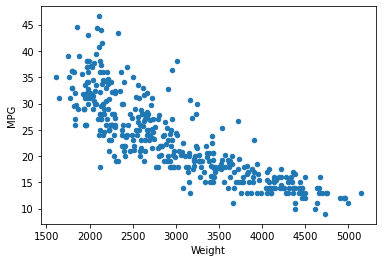

In [6]:
df.plot.scatter(x = "Weight", y = "MPG")

You are encouraged to create more plots to visualize relationships amongst other columns


## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to predict


In [7]:
y = df["MPG"] # y is the target

We identify the features next. Features are the values our machine learning model learns from


In [8]:
X = df[["Horsepower","Weight"]] # X is the set of features

## Task 3 - Split the data set


We split the data set in the ratio of 70:30. 70% training data, 30% testing data.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

The random_state variable controls the shuffling applied to the data before applying the split. Pass the same integer for reproducible output across multiple function calls


## Task 4 - Build and Train a Linear Regression Model


Create a LR model


In [10]:
lr = LinearRegression()

Train/Fit the model using the training data set


In [11]:
lr.fit(X_train,y_train)

LinearRegression()

## Task 5 - Evaluate the model


Your model is now trained. We use the testing data to evaluate the model.


In [12]:
lr.score(X_test, y_test)

0.7691968626070728

To compute the detailed metrics we need two values, the original mileage and the predicted mileage.


In [13]:
original_values = y_test
predicted_values = lr.predict(X_test)

##### R Squared


In [14]:
r2_score(original_values, predicted_values) # Higher the value the better the model

0.7691968626070728

##### Mean Squared Error


In [15]:
mean_squared_error(original_values, predicted_values) # Lower the value the better the model

12.21274893832399

##### Root Mean Squared Error


In [16]:
sqrt(mean_squared_error(original_values, predicted_values)) # Lower the value the better the model

3.4946743679953918

##### Mean Absolute Error


In [17]:
mean_absolute_error(original_values, predicted_values) # Lower the value the better the model

2.8530678815092534

# Exercises


In [18]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"

### Exercise 1 - Loading a dataset (diamond dataset)


In [19]:
df2 = pd.read_csv(URL2)

<details>
    <summary>Click here for a Hint</summary>
    
Use the read_csv function

</details>


<details>
    <summary>Click here for Solution</summary>

```python
df2 = pd.read_csv(URL2)
```

</details>


### Exercise 2 - Identify the target column and the data columns


 - Use the price column as target
 - Use the columns carat, depth and table as features


In [20]:
y = df2["price"]
X = df2[["carat","depth","table"]]

<details>
    <summary>Click here for a Hint</summary>
    
Refer to Task 2
</details>


<details>
    <summary>Click here for Solution</summary>

```python
y = df2["price"]
X = df2[["carat","depth","table"]]
```

</details>


### Exercise 3 - Split the data


Split the dataset into training and testing sets. Make 25% of the data as testing set. Use 42 as random state.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<details>
    <summary>Click here for a Hint</summary>
    
Use the train_test_split function
</details>


<details>
    <summary>Click here for Solution</summary>

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

```

</details>


### Exercise 4 - Predict values


In [22]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

Predict the values using the test data.


In [23]:
original_values = y_test
predicted_values = lr2.predict(X_test)

<details>
    <summary>Click here for a Hint</summary>
    
Use the predict() method
</details>


<details>
    <summary>Click here for Solution</summary>

```python
original_values = y_test
predicted_values = lr2.predict(X_test)

```

</details>


### Exercise 5 - Evaluate the model


Print the metrics :
- R squared
- mean absolute error
- mean squared error
- root mean squared error


In [24]:
print(r2_score(original_values, predicted_values))
print(mean_absolute_error(original_values, predicted_values))
print(mean_squared_error(original_values, predicted_values))
print(sqrt(mean_squared_error(original_values, predicted_values)))

0.852949398522144
991.8625215831571
2310119.635474932
1519.9077720292544


<details>
    <summary>Click here for a Hint</summary>
    
Use the metrics functions </details>


<details>
    <summary>Click here for Solution</summary>

```python
print(r2_score(original_values, predicted_values))
print(mean_absolute_error(original_values, predicted_values))
print(mean_squared_error(original_values, predicted_values))
print(sqrt(mean_squared_error(original_values, predicted_values)))

```

</details>


Congratulations you have completed this lab.<br>


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/)


### Other Contributors


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-04-15|0.1|Ramesh Sannareddy|Initial Version Created|


Copyright © 2023 IBM Corporation. All rights reserved.
